Pont de Wheatstone
==================

- Equations de base du pont.
- Relation entre la variation de résistance et la tension
- Influence de la plage de variation
- Linéarisation
  + Identification
  + Dérivée

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression

def plotIt(x,y, title="sortie", xlab="X", ylab="Y"):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')

    seaborn.despine(ax=ax, offset=0)

def plotIt2(x1,y1,x2,y2,title="sortie", xlab="X", ylab="Y", legends=""):
    fig, ax = plt.subplots()
    ax.plot(x1, y1, x2,y2)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(title)
    ax.grid(True, which='both')
    ax.legend(legends)

    seaborn.despine(ax=ax, offset=0)

In [25]:
vR0=1000
Vp=1

In [26]:
def vUDiff(DR):
    Ug=(vR0+DR)/(2*vR0+DR)
    Ud=vR0/(2*vR0)
    return Ug-Ud

Influence de la plage de mesure
-------------------------------

Varier la plage de mesure. Commencer avec 500 ohms pour voir l'effet, puis 50 ohms pour suggérer que c'est négligeable pour une petite variation.

In [27]:
spanDR=500

In [28]:
vDR=np.arange(-spanDR,spanDR,1)
vUD=np.zeros(len(vDR))
for i in range(len(vDR)):
    vUD[i]=vUDiff(vDR[i])

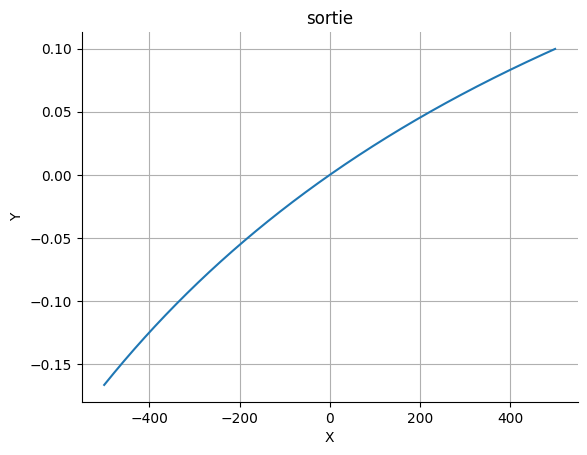

In [29]:
#| label fig-sortie-large-variation
plotIt(vDR, vUD)

In [30]:
spanDR=50
vDR=np.arange(-spanDR,spanDR,1)
vUD=np.zeros(len(vDR))
for i in range(len(vDR)):
    vUD[i]=vUDiff(vDR[i])

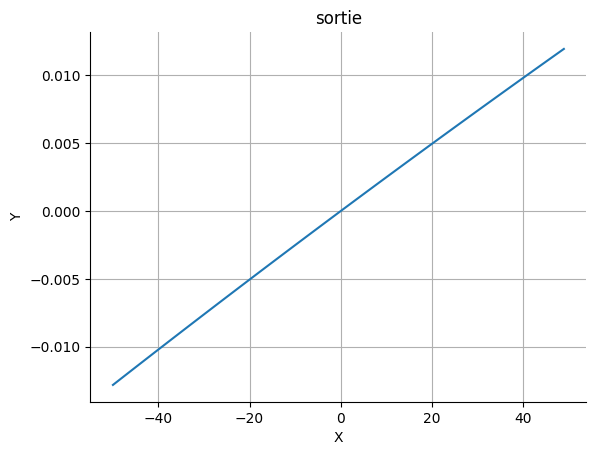

In [31]:
#| label fig-sortie-petite-variation
plotIt(vDR, vUD)

In [32]:
model = LinearRegression()
vDRt=vDR.reshape((-1, 1))
tmp=model.fit(vDRt, vUD)
vPred= model.predict(vDRt)

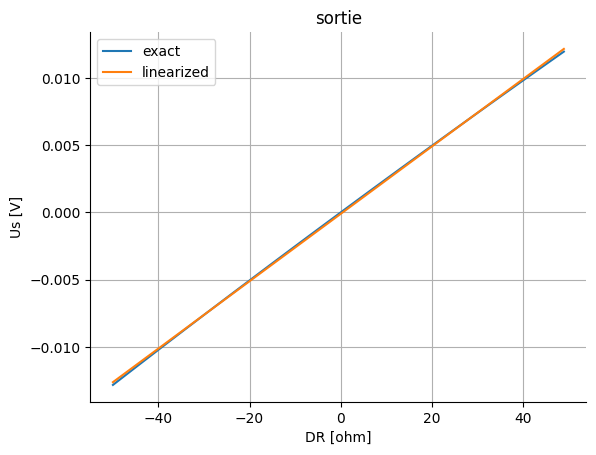

In [33]:
plotIt2(vDR, vUD, vDR, vPred, xlab="DR [ohm]", ylab="Us [V]", legends=["exact","linearized"])

Calculs symboliques
-------------------

On calcule la valeur algébriquement pour déterminer la pente de la courbe au point d'intérêt.

In [34]:
from sympy import symbols
R0, DR = symbols('R0 DR')
def Udiff(R0,DR):
    Ug=(R0+DR)/(2*R0+DR)
    Ud=R0/(2*R0)
    return Ug-Ud

In [35]:
Udiff(R0, DR)

(DR + R0)/(DR + 2*R0) - 1/2

In [36]:
dDUdiff = Udiff(R0,DR).diff(DR)
dDUdiff

-(DR + R0)/(DR + 2*R0)**2 + 1/(DR + 2*R0)

In [37]:
# Pente autour du point de fonctionnement
dDUdiff.subs(DR,0)

1/(4*R0)

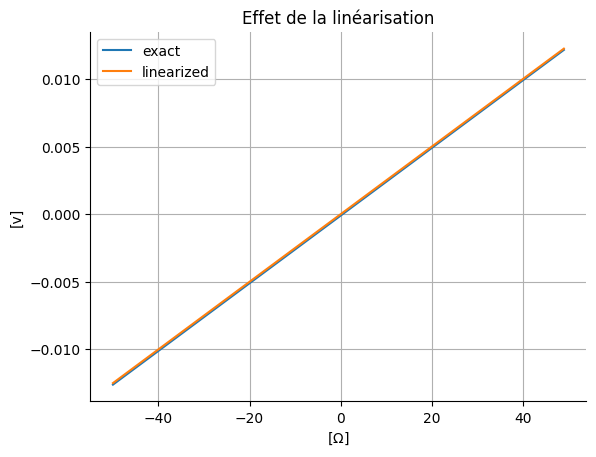

In [38]:
vDiff = vDR/(4*vR0)
plotIt2(vDR, vPred, vDR, vDiff , xlab="[$\Omega$]", ylab="[v]", title="Effet de la linéarisation", legends=["exact","linearized"])

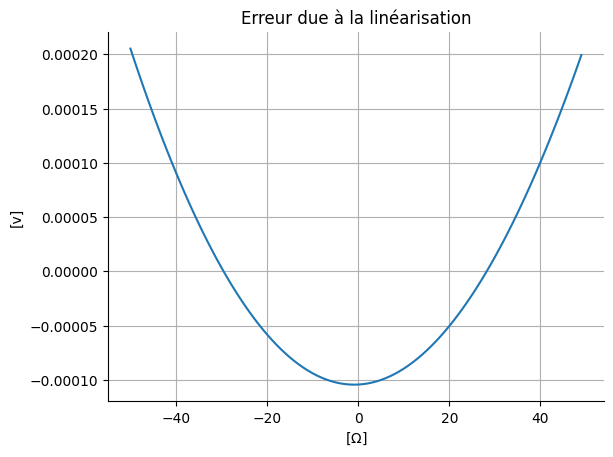

In [39]:
plotIt(vDR, vPred-vUD, xlab="[$\Omega$]", ylab="[v]", title="Erreur due à la linéarisation")